In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np

from q3_f import f, gradient
from trust_region import trust_region
from convergence_plots import trajectories_convergence, error_convergence, gradient_norm_convergence, quotient_convergence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Trust region search with dogleg approximation


After 85 iterations, x_min = [1.0, 0.000979], f(x_min) = 2.364237547117204e-13


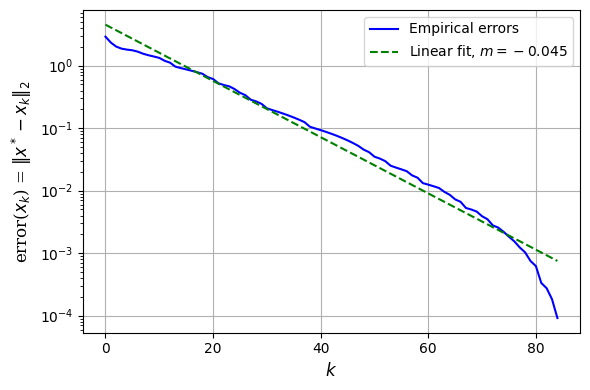

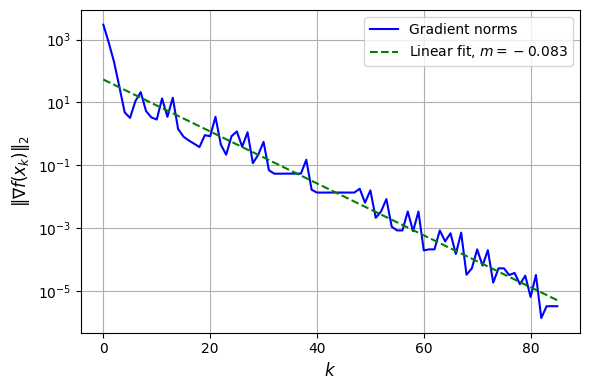

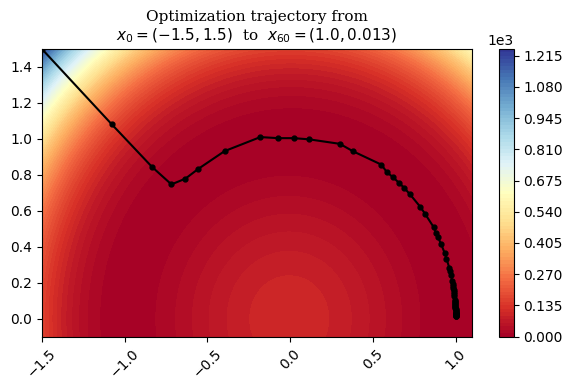

In [8]:
# Trust Region Search

xs, errors = trust_region(
    x_0=np.array([[-1.5],[1.5]]),
    max_iter=100
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True)
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=60, end_idx=None, 
    xlims=((-1.5,1.1),None), 
    ylims=((-0.1,1.5),None),
    arrows=False
)

In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from convergence_plots import fontdict

def quadratic_error_convergence(errors, xsq=True, ylog=True, overlay_fit=True, ignore=0):

    y_fit = errors[errors != 0.] if ylog else errors
    x_fit = np.arange(y_fit.size)

    plt.figure(figsize=(6, 4))
    plt.plot(x_fit, y_fit, color='blue', label='Empirical errors')
    plt.xlabel(r'$k$', fontdict=fontdict)
    plt.ylabel(r'error($x_k$) = $\|x^*-x_k\|_2$', fontdict=fontdict)
    
    if ylog:
        plt.yscale('log')
    
    if overlay_fit:
        x_fit = x_fit[ignore:]; y_fit = y_fit[ignore:]
        x_fit = x_fit.reshape(-1, 1)
        lr = LinearRegression().fit(
            x_fit if not xsq else np.square(x_fit),
            y_fit if not ylog else np.log10(y_fit)
        )
        preds = lr.predict(x_fit if not xsq else np.square(x_fit))
        plt.plot(x_fit.flatten(), preds if not ylog else np.power(10, preds), '--', color='green', label=fr'Quadratic fit')
        plt.legend()
    
    plt.grid()
    plt.tight_layout()
    plt.show()

def quadratic_grad_convergence(xs, gradient, xsq=False, ylog=False, overlay_fit=False, ignore=0, order=2):

    y_fit = np.array([np.linalg.norm(gradient(x)) for x in xs])
    x_fit = np.arange(y_fit.size)

    plt.figure(figsize=(6, 4))
    plt.plot(x_fit, y_fit, color='blue', label='Gradient norms')
    plt.xlabel(r'$k$', fontdict=fontdict)
    plt.ylabel(r'$\|\nabla f(x_k)\|_2$', fontdict=fontdict)
    if ylog:
        plt.yscale('log')

    if overlay_fit:
        x_fit = x_fit[ignore:]; y_fit = y_fit[ignore:]
        x_fit = x_fit.reshape(-1, 1)
        lr = LinearRegression().fit(
            x_fit if not xsq else np.power(x_fit, order),
            y_fit if not ylog else np.log10(y_fit)
        )
        preds = lr.predict(x_fit if not xsq else np.power(x_fit, order))
        plt.plot(x_fit.flatten(), preds if not ylog else np.power(10, preds), '--', color='green', label='Quadratic fit')
        plt.legend()

    plt.grid()
    plt.tight_layout()
    plt.show()

Trust region search with dogleg approximation
After 5 iterations, x_min = [1.0, 0.0], f(x_min) = 8.393832803068354e-20


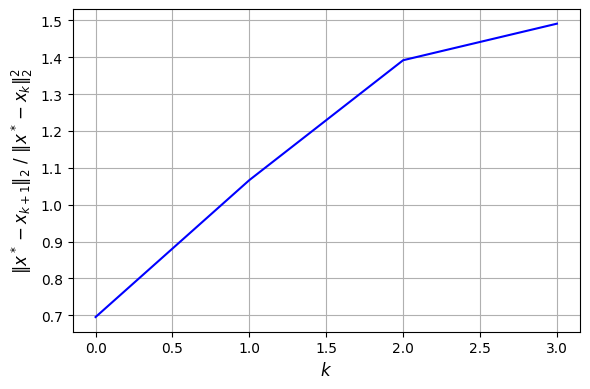

In [26]:
# Trust Region Search

xs, errors = trust_region(
    x_0=np.array([[1.5],[0.]]),
    max_iter=100
)

# error_convergence(errors, xlog=False, ylog=True, overlay_fit=False)
# ### FIT QUADRATIC
# ### QUOTIENTS OF THE PERTURBED POINTS
# gradient_norm_convergence(xs, gradient, ylog=True)
# trajectories_convergence(
#     xs, f,
#     start_idx=0, middle_idx=3, end_idx=None,
#     xlims=((0.99,1.51),None),
#     ylims=((-0.1,0.1),None),
#     arrows=True
# )

quadratic_error_convergence(errors, xsq=True, ylog=True, overlay_fit=True)
quadratic_grad_convergence(xs, gradient, xsq=True, ylog=True, overlay_fit=True)

Trust region search with dogleg approximation
After 6 iterations, x_min = [1.0, 0.0], f(x_min) = 1.097330294325232e-23


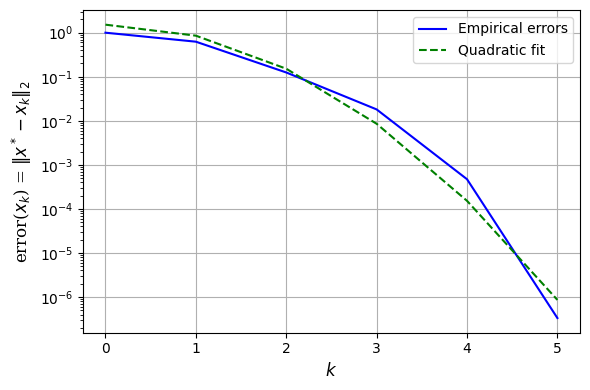

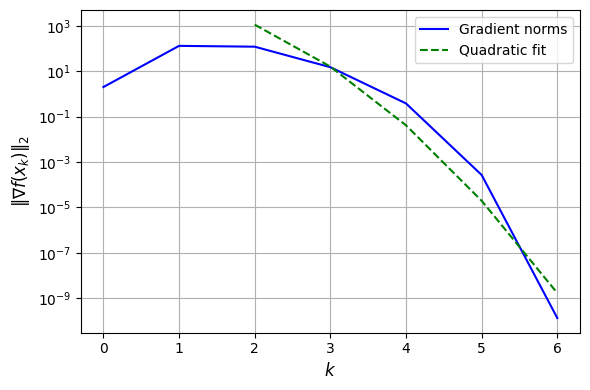

In [22]:
# Trust Region Search

xs, errors = trust_region(
    x_0=np.array([[0.],[0.]]),
    max_iter=100
)

# error_convergence(errors, xlog=False, ylog=True, overlay_fit=False)
# gradient_norm_convergence(xs, gradient, ylog=True)
# trajectories_convergence(
#     xs, f, 
#     start_idx=0, middle_idx=4, end_idx=None,
#     xlims=((-0.1,1.2),(0.99,1.13)), 
#     ylims=((-0.1,0.1),(-0.1,0.1)),
#     arrows=True
# )

quadratic_error_convergence(errors, xsq=True, ylog=True, overlay_fit=True)
quadratic_grad_convergence(xs, gradient, xsq=True, ylog=True, overlay_fit=True, ignore=2, order=2)

Trust region search with dogleg approximation
After 48 iterations, x_min = [1.0, 0.00074], f(x_min) = 7.525517054130098e-14


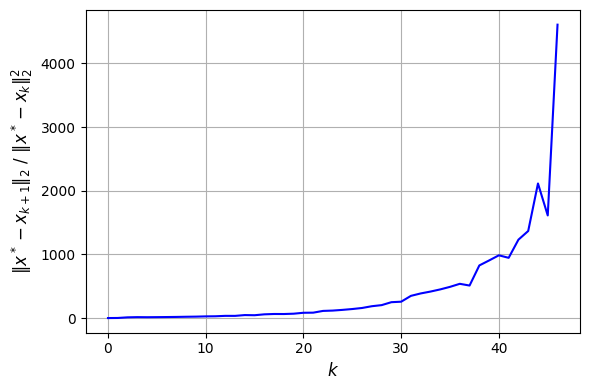

In [24]:
# Trust Region Search

xs, errors = trust_region(
    x_0=np.array([[1.5],[0.1]]),
    max_iter=100
)

# error_convergence(errors, xlog=False, ylog=True, overlay_fit=True)
# gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True, ignore=5)
# trajectories_convergence(
#     xs, f, 
#     start_idx=0, middle_idx=30, end_idx=None, 
#     xlims=((0.95,1.55),None),
#     ylims=((-0.005,0.105),None),
#     arrows=False
# )

quotient_convergence(errors, order=2)

Trust region search with dogleg approximation
After 76 iterations, x_min = [1.0, 0.000853], f(x_min) = 1.3241517052747865e-13


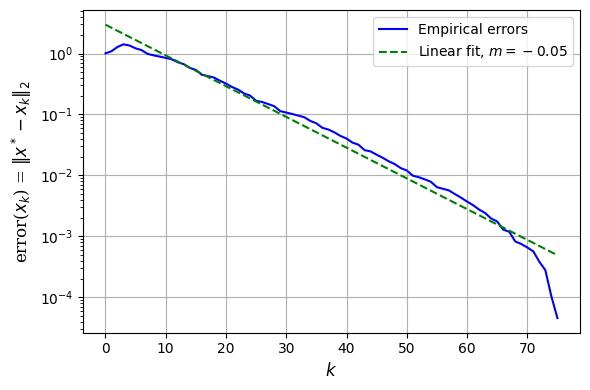

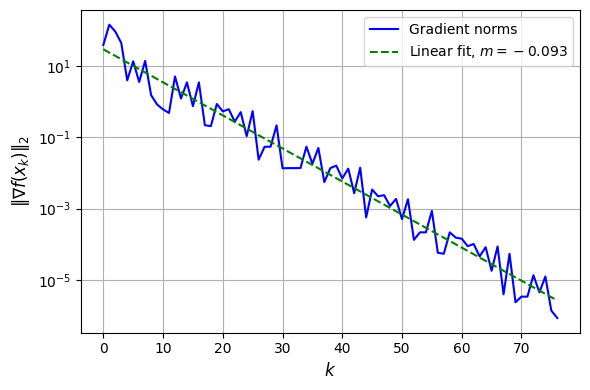

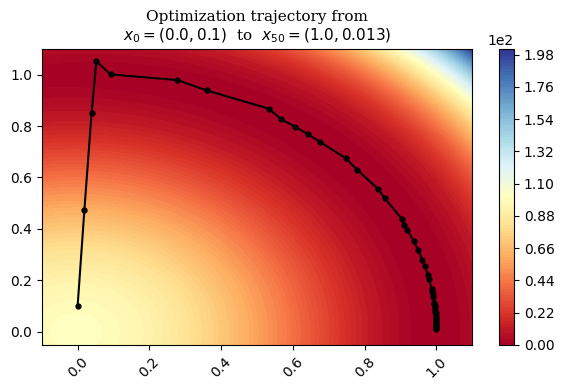

In [6]:
# Trust Region Search

xs, errors = trust_region(
    x_0=np.array([[0.],[0.1]]),
    max_iter=100
)

error_convergence(errors, xlog=False, ylog=True, overlay_fit=True)
gradient_norm_convergence(xs, gradient, ylog=True, overlay_fit=True)
trajectories_convergence(
    xs, f, 
    start_idx=0, middle_idx=50, end_idx=None,
    xlims=((-0.1,1.1),None), 
    ylims=((-0.05,1.1),None),
    arrows=False
)